<a href="https://colab.research.google.com/github/cjaucian/MAT421/blob/main/ModuleC_19_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**19.1 Root Finding Problem Statement**

The root, xr, of a function, f(x), is commonly known as the zero becuase f(xr) = 0. In many functions, we can solve for the x value which makes the function equal zero. For instance, we can use inverse operations to find the zeros of f(x) = x^2 - 9. The roots of this function are clearly, 3 and -3. But it is not possible to find the exact roots of every function. For instance, f(x) = cos(x) - x does not have a straight forward root like was modeled before. It becomes necessary to create numerical approximations of the roots of f(x).

**Example**  Use the fsolve function from SciPy to compute the root of f(x) = cos(x) - x near -1. Verify that the solution is a root (or close enough).

In [ ]:
import numpy as np
from scipy import optimize

f = lambda x: np.cos(x) - x
r = optimize.fsolve(f, -1)
print("r = ", r)

# Verify the solution is a root
result = f(r)
print("result = ", result)

r =  [0.73908513]
result =  [0.]


**Example**  The function f(x) = 1/x has no root. Use the fsolve function to try to compute the root of f(x) = 1/x. Turn on the full_output to see what is going on. Check the documentation for details.

In [ ]:
f = lambda x: 1/x

r, infodict, ier, mesg = optimize.fsolve(f, -1, full_output=True)
print("r = ", r)

result = f(r)
print("result = ", result)

print(mesg)

r =  [-1.7602368e+83]
result =  [-5.68105383e-84]
The number of calls to function has reached maxfev = 400.


From the example, we received a value of r but it is not a root. The value of f(r), result, is a very small number but still not a root. By turning on full_output we will get more information about what is happening, by looking at mesg we know that "The number of calls to function has reached maxfev = 400."

**19.2 Tolerance**

In the real-world problem solving in engineering and science, the numerical approximation method incurs an error. In these instances, error is the difference between the computed value and the expected value. An important concept for engineering problem solving is tolerance, which is the level of error that is deemed acceptable for a specific application. To calculate the root of a function numerically, it is necessary to state an error and tolerance value. Stating both of these make it possible to converge to a solution, which is when a numerical solution has an error value that is smaller than the stated tolerance.

**19.3 Bisection Method**

The Intermediate Value Theorem states that a function, f(x), which is continuous on an interval, [a,b], will have a root c if the sign of f(a) is not the same as the sign of f(b).


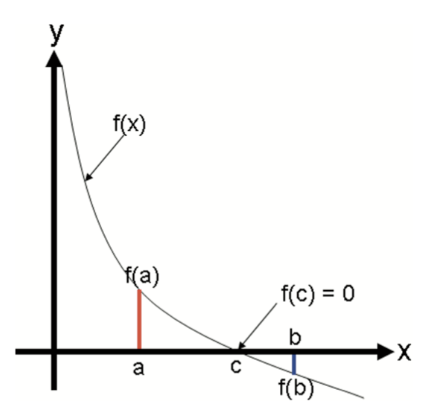

The intermediate value theorem is used in the Bisection Method to solve for the roots. In the bisection method, we take a value a which is less than a value b. If f(a) is positive and f(b) is negative, then there must be a value c which is a root. The method first tests m = (a+b)/2, the midpoint, to see if f(m) = 0. If f(m) > 0, then we can improve the bounds of the intermediate value theorem to [m,b]. If f(m) < 0, then we can improve the bounds to be [a,m]. Then the process repeats by testing the midpoint of the bounds until we find an f(m) that equals 0 or a value with an acceptable error.

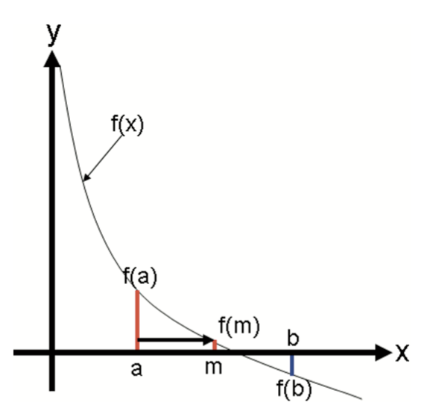

**Example**  Program a function my_bisection(f,a,b,tol) that approximates a root r of f, bounded by a and b to within |f(a+b/2)|<tol.

In [ ]:
import numpy as np

def my_bisection(f, a, b, tol):
      # approximates a root, R, of f bounded
      # by a and b to within the stated tolerance
      # | f(m) | < tol with m being the midpoint
      # between a and b. Recursive implementation

      # check if a and b bound a root
      if np.sign(f(a)) == np.sign(f(b)):
            raise Exception(
                "The scalars a and b do not bound a root")

      # get midpoint
      m = (a + b)/2

      if np.abs(f(m)) < tol:
            # stopping condition, report m as root
            return m
      elif np.sign(f(a)) == np.sign(f(m)):
            # case where m is an improvement on a.
            # Make recursive call with a = m
            return my_bisection(f, m, b, tol)
      elif np.sign(f(b)) == np.sign(f(m)):
            # case where m is an improvement on b.
            # Make recursive call with b = m
            return my_bisection(f, a, m, tol)

**Example**  The squareroot of 3 can be computed as the root of the function f(x) = x^2 - 3. Starting at a = 0 and b = 3, use my_bisection to approximate the squareroot of 3 to a tolerance of |f(x)| < 0.1 and |f(x)| < 0.01. Verify that the results are close to a root by plugging the root back into the function.

In [ ]:
f = lambda x: x**2 - 3

r1 = my_bisection(f, 0, 3, 0.1)
print("r1 = ", r1)
r01 = my_bisection(f, 0, 3, 0.01)
print("r01 = ", r01)

print("f(r1) = ", f(r1))
print("f(r01) = ", f(r01))

r1 =  1.734375
r01 =  1.734375
f(r1) =  0.008056640625
f(r01) =  0.008056640625


**Example**  See what happens if you use a = 3 and b = 5 for the above function.

In [ ]:
my_bisection(f, 3, 5, 0.01)

Exception: The scalars a and b do not bound a root

**19.4 Newton-Raphson Method**

For the Newton-Raphson method, we have a smooth function, f(x), with an unknown root, xr. An initial guess of x0 starts an iterative process to improve the guess until we get an x0 "close enough" to 0. Once we have a guess within a reasonable error, we take a linear approximation of f(x) near x0 to find where the straight line crosses the x-axis.

The linear approximation of f(x) near x0 is: f(x) = f(x0) + f'(x0)(x - x0). Using this we can find x1 such that f(x1) = 0.

0 = f(x0) + f'(x0)(x1 - x0)
Which can then be solved for x1: x1 = x0 - (f(x0) / f'(x0)).

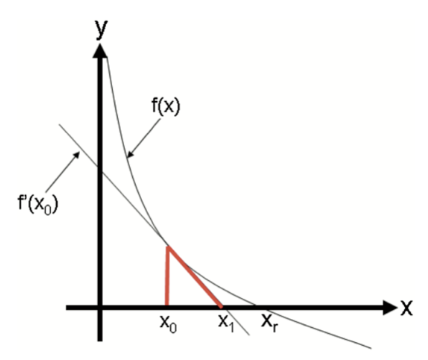

The Newton step will take continuously improved guesses, xi, by using previous guesses, xi - 1:
xi = xi - 1 - (g(xi - 1) / g'(xi - 1)).

**Example**  Again, the squareroot 3 is the root of the function f(x) = x^2 - 3. Using x0 = 1.5 as a starting point, use the previous equation to estimate squareroot 3. Compare this approximation with the value computed by Python's sqrt function.

x = 1.5 - ((1.5^2 - 3) / (2*1.5)) = 1.75

In [7]:
import numpy as np

f = lambda x: x**2 - 3
f_prime = lambda x: 2*x
newton_raphson = 1.5 - (f(1.5))/(f_prime(1.5))

print("newton_raphson = ", newton_raphson)
print("sqrt(3) = ", np.sqrt(3))

newton_raphson =  1.75
sqrt(3) =  1.7320508075688772


**Example**  Write a function my_newton(f, df, x0, tol) where the output is an estimate of the root of f, f is a function object f(x), df is a function object f'(x), x0 is an initial guess, and tol is the error tolerance. The error measurement should be |f(x)|.

In [8]:
def my_newton(f, df, x0, tol):
      # output is an estimation of the root of f
      # using the Newton-Raphson method
      # recursive implementation
      if abs(f(x0)) < tol:
            return x0
      else:
            return my_newton(f, df, x0 - f(x0)/df(x0), tol)

**Example**  Use my_newton to compute squareroot 3 to within a tolerance of 1e-6 starting at x0 = 1.9.

In [9]:
estimate = my_newton(f, f_prime, 1.9, 1e-6)
print("estimate = ", estimate)
print("sqrt(3) = ", np.sqrt(3))

estimate =  1.7320508076412873
sqrt(3) =  1.7320508075688772


If the initial guess is close to the root, xr, then the Newton-Raphson method will converge to the root much quicker than the Bisection method. But without knowing where the root is, it is difficult to make a guess that is close to the root. This means that it is possible to make a guess that does not converge and will instead lead you farther away from the root.

**Example**  Compute a single Newton step to get an improved approximation of the root of the function f(x) = x^3 + x^2 - 5x - 2 and initial guess x0 = 0.99.

In [13]:
x0 = 0.99
x1 = x0 - (x0**3 + x0**2 - 5*x0 - 2)/(3*x0**2 + 2*x0 - 5)
print("x1 = ", x1)

x1 =  -61.74025094102825


The initial guess at f'(x0) = -0.0797 is really close to zero. Which creates a large error at x1.

**19.5 Root Finding in Python**

As a tool, Python is powerful with the built-in functions. We can utilize the root-finding functions in Python, f_solve from scipy.optimize.

The f_solve function can take in arguments for different values for finding the root, but the most important is: 1) the function we are solving for, 2) the initial guess.

**Example**  Compute the root of the function f(x) = x^4-200x^3-100x^2-x+100 using f_solve.

In [14]:
from scipy.optimize import fsolve

f = lambda x: x**4-200*x**3-100*x**2-x+100

fsolve(f, [2,180])

array([  0.65609298, 200.49876865])